# 0.0 Imports

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px

from IPython.display       import Image
from IPython.core.display  import HTML

## 0.1 Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'fivethirtyeight' )
    plt.rcParams['figure.figsize'] = [20, 8]
    plt.rcParams['font.size'] = 24
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Ubuntu'
    plt.rcParams['font.monospace'] = 'Ubuntu Mono'
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 12
    
    display( HTML( '<style>.container { width:70% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    #sns.set()
    sns.set_style('ticks')
    

def get_summary(numerical_attributes):
    
    # Central Tendency - mean, meadina 
    ct1 = pd.DataFrame( numerical_attributes.apply( np.mean ) ).T
    ct2 = pd.DataFrame( numerical_attributes.apply( np.median ) ).T

    # dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame( numerical_attributes.apply( np.std ) ).T 
    d2 = pd.DataFrame( numerical_attributes.apply( min ) ).T 
    d3 = pd.DataFrame( numerical_attributes.apply( max ) ).T 
    d4 = pd.DataFrame( numerical_attributes.apply( lambda x: x.max() - x.min() ) ).T 
    d5 = pd.DataFrame( numerical_attributes.apply( lambda x: x.skew() ) ).T 
    d6 = pd.DataFrame( numerical_attributes.apply( lambda x: x.kurtosis() ) ).T 

    # concatenar
    m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
    
    return m



In [3]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Load Data

In [4]:
df = pd.read_csv('../data/raw/train.csv')

# 1.0 Data Description

In [5]:
df1 = df.copy()

In [6]:
df1.columns = map(str.lower, df1.columns)

In [7]:
df1.head(10)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [8]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 381109
Number of Cols: 12


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
cons = pd.DataFrame({'colunas' : df.columns,
                    'tipo': df.dtypes,
                    'missing' : df.isna().sum(),
                    'size' : df.shape[0],
                    'unicos': df.nunique()})

cons['percentual'] = round(cons['missing'] / cons['size'],2)

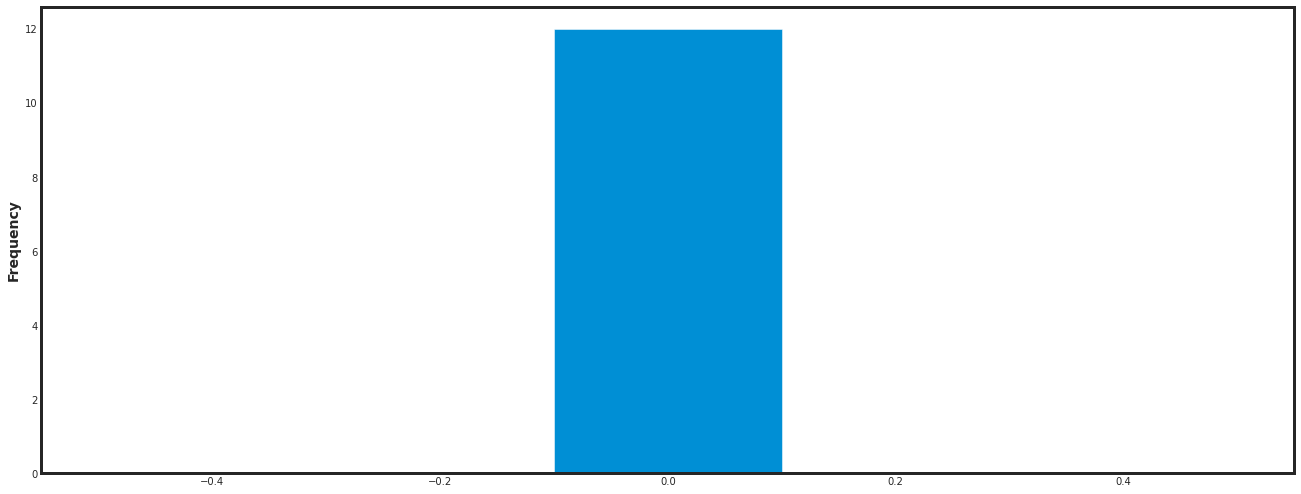

In [11]:
cons.percentual.plot.hist( bins = 5);

In [12]:
num_attributes = df1.select_dtypes( include = [ 'int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

## 1.1 Numerical Attributes

In [13]:
get_summary(num_attributes)

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


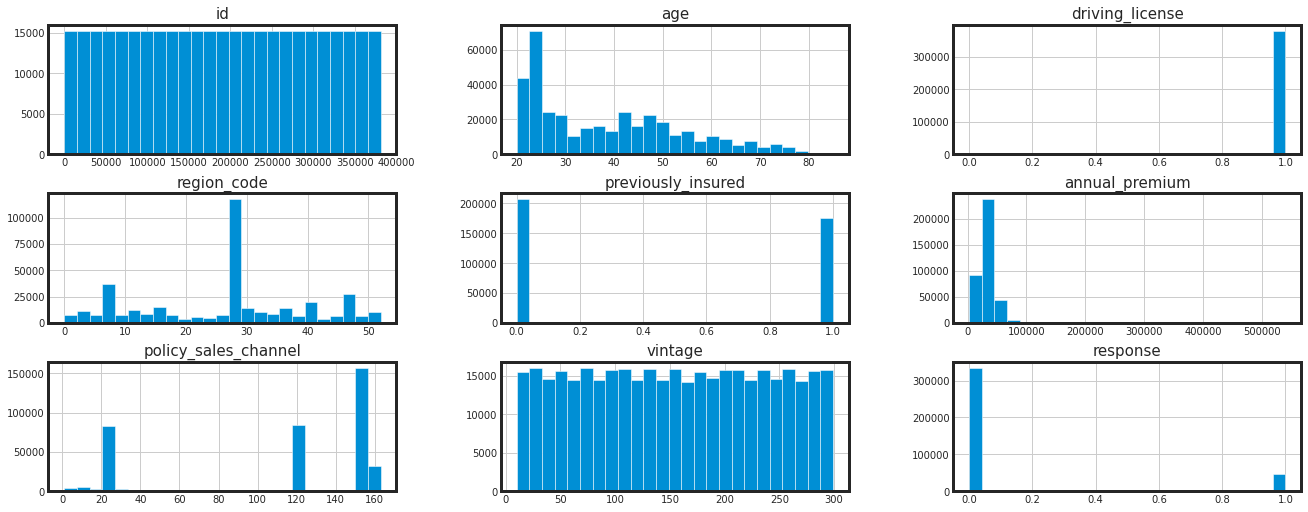

In [14]:
num_attributes.hist(bins = 25);

## 1.2 Categorical Attributes

In [15]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

gender            2
vehicle_age       3
vehicle_damage    2
dtype: int64

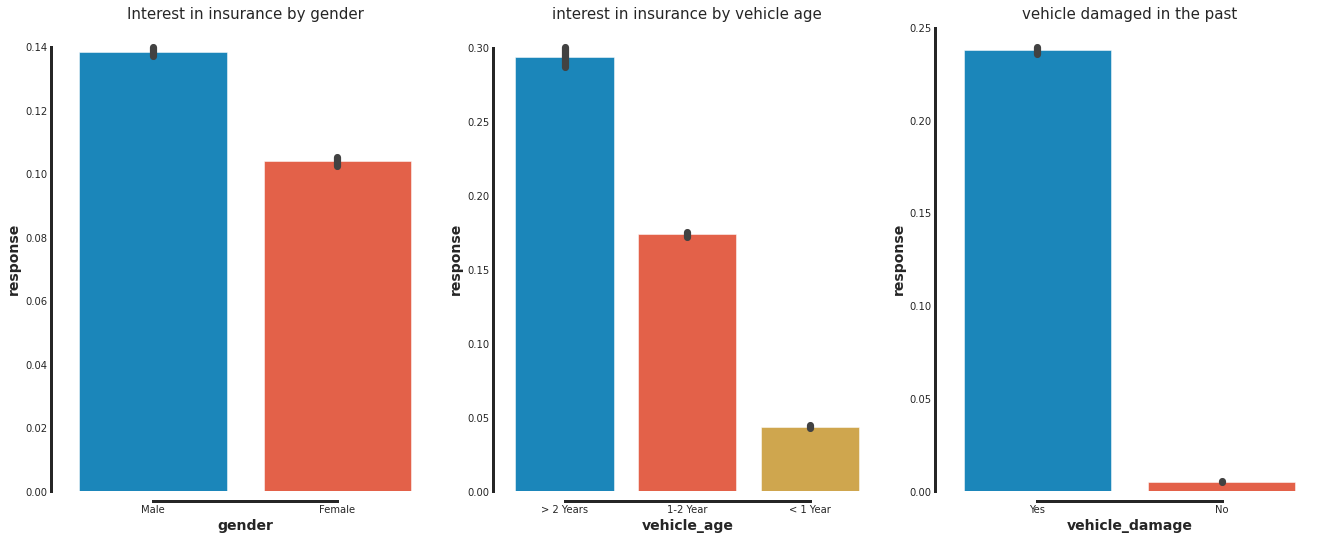

In [16]:
plt.subplot( 1, 3, 1 )
sns.barplot( x='gender', y='response', data=df1 )
sns.despine(offset = 10, trim = True)
plt.title('Interest in insurance by gender')

plt.subplot( 1, 3, 2 )
sns.barplot( x='vehicle_age', y='response', data=df1 )
sns.despine(offset = 10, trim = True)
plt.title('interest in insurance by vehicle age')

plt.subplot( 1, 3, 3 )
sns.barplot( x='vehicle_damage', y='response', data=df1 )
sns.despine(offset = 10, trim = True)
plt.title('vehicle damaged in the past');

## 1.3 Target

In [17]:
df1['response'].value_counts()

0    334399
1     46710
Name: response, dtype: int64

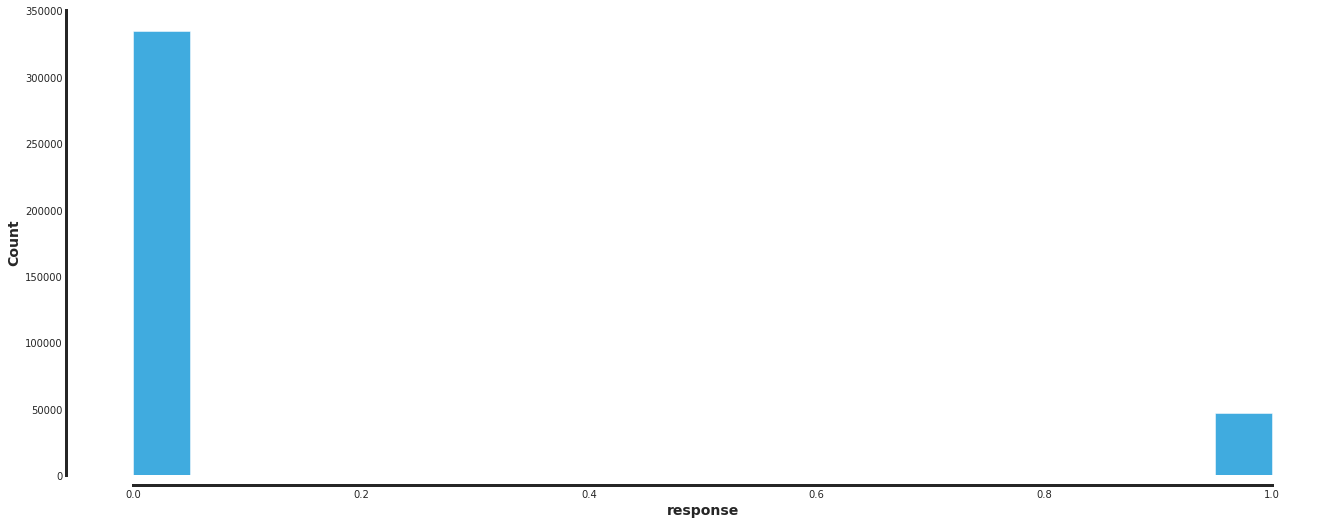

In [18]:
sns.histplot(df1, x = 'response')
sns.despine(offset = 10, trim = True);

# 2.0 Hypothesis

- People is equaly interested in insurance regardless their gender
**FALSE**
- The older the vehicle the greater is the interest in acquiring an insurance
**TRUE**
- If the owner damaged his vehicle before, he is more likely to acquire an insurance
**TRUE**
- People who has driving license are more interested in insurance
**TRUE**
- Different regions have different interesst in insurance
**TRUE**
- Different policy sales channel have different outcome for the customer
**TRUE**
- Who was previosly insured is less likely to acquire a new insurance service (had already showed commitment)
**TRUE**
- The higher Annual Premium, the lower interest in insurance
**FALSE**

- The higher vintage, the higher interest in insurance
**FALSE**

- The higher age, the higher interest in insurance
**TRUE**

# 3.0 Exploratory Data Analysis

In [19]:
df2 = df1.copy()

## 3.1 People who has driving license are more interested in insurance

In [20]:
df2['driving_license'] = df2['driving_license'].map({1: 'Yes', 0: 'No'})

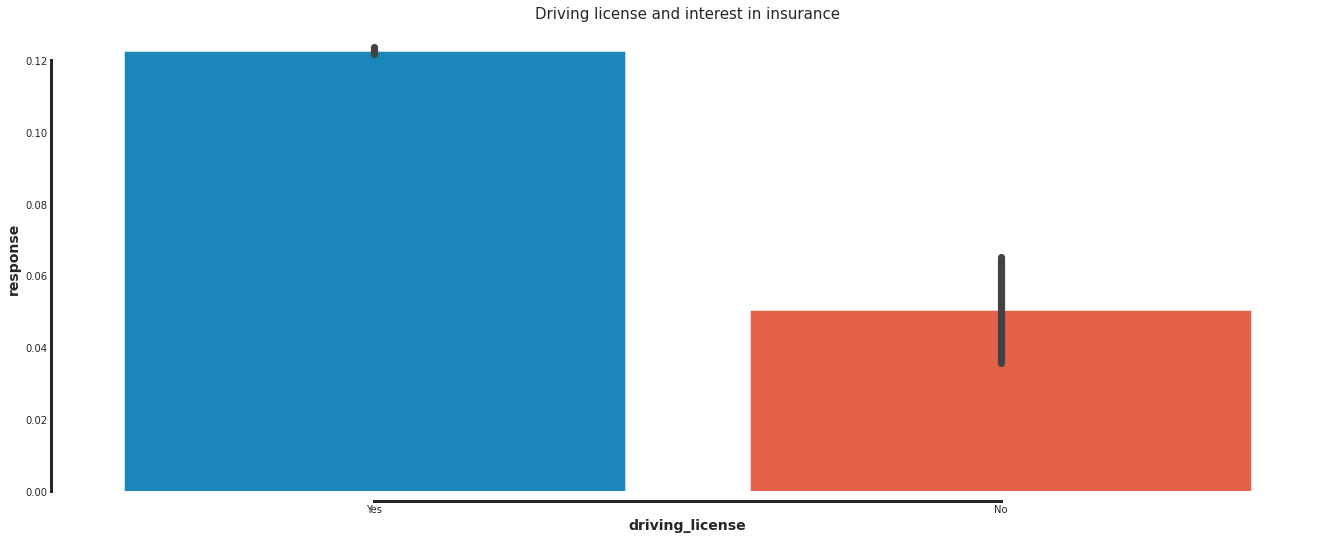

In [21]:
sns.barplot(x = 'driving_license', y = 'response', data = df2)
sns.despine(offset = 10, trim = True)
plt.title('Driving license and interest in insurance'); 

## 3.2 Different regions have different interest in insurance

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
region_code,28.0,8.0,41.0,46.0,29.0,3.0,11.0,15.0,30.0,35.0,33.0,36.0,18.0,47.0,50.0
response,19917.0,3257.0,2224.0,2032.0,1365.0,1181.0,1041.0,958.0,900.0,865.0,760.0,703.0,678.0,652.0,642.0


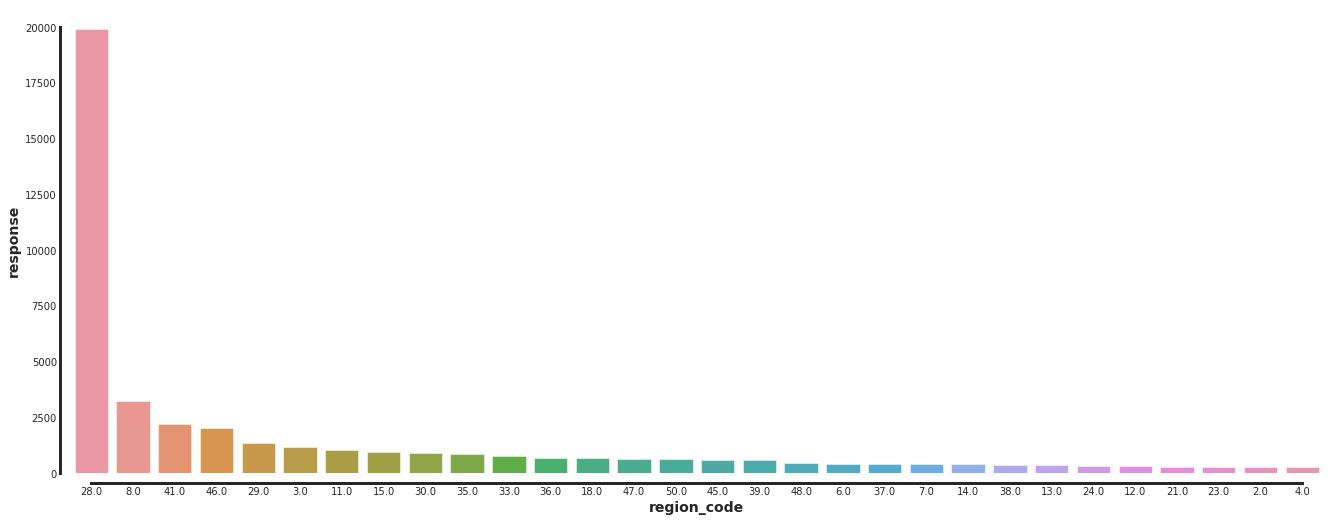

In [38]:
aux = df2[['region_code', 'response']].groupby('region_code').sum().sort_values(by = 'response', ascending = False).reset_index() 
sns.barplot(x = 'region_code', y = 'response', data = aux, order = aux['region_code'].head(30))
sns.despine(offset = 10, trim = True)
aux.head(15).T

## 3.3 Different policy sales channel have different outcome for the customer

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
policy_sales_channel,26.0,124.0,152.0,156.0,157.0,122.0,154.0,163.0,160.0,155.0,25.0,13.0,55.0,7.0,31.0
response,15891.0,13996.0,3858.0,2297.0,1794.0,1720.0,1474.0,880.0,475.0,395.0,369.0,275.0,189.0,182.0,160.0


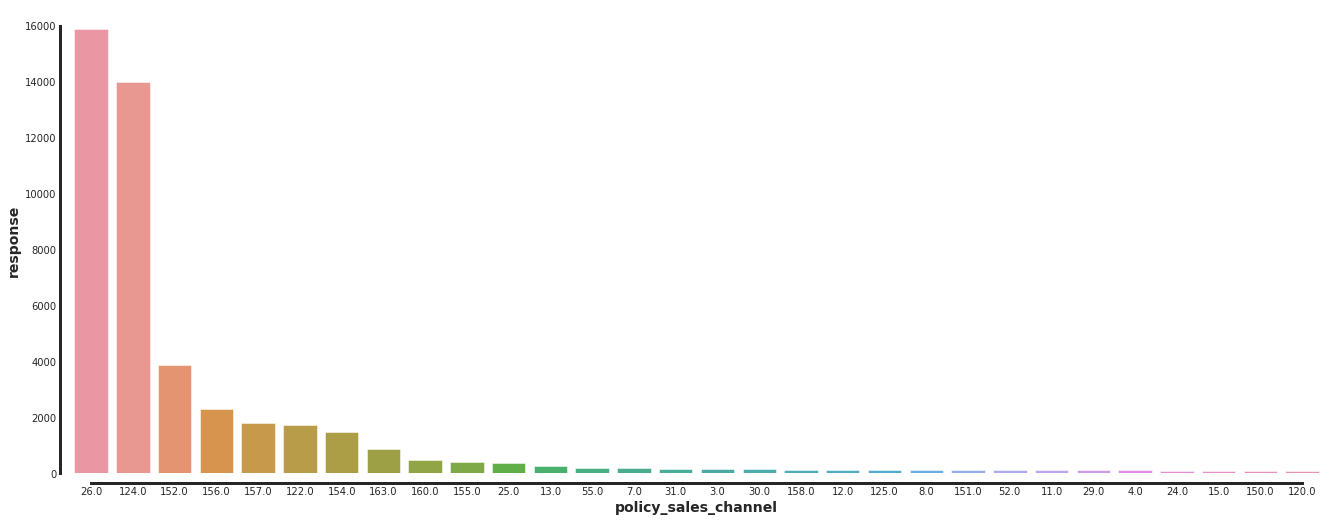

In [36]:
aux = df2[['policy_sales_channel', 'response']].groupby('policy_sales_channel').sum().sort_values(by = 'response', ascending = False).reset_index() 
sns.barplot(x = 'policy_sales_channel', y = 'response', data = aux.head(30), order = aux['policy_sales_channel'].head(30))
sns.despine(offset = 10, trim = True);
aux.head(15).T

## 3.4 Who was previosly insured is less likely to acquire a new insurance service

In [ ]:
df2['previously_insured'] = df2['previously_insured'].map({1: 'Yes', 0: 'No'})

In [ ]:
sns.barplot(x = 'previously_insured', y = 'response', data = df2)
sns.despine(offset = 10, trim = True)
plt.title('Previously insured and interest in insurance');

df2['previously_insured'].value_counts()

## 3.5 The higher Annual Premium, the lower interest in insurance

In [ ]:
aux1 = df2[df2['response'] == 1]
aux2 = df2[df2['response'] == 0]

x = aux1['annual_premium'].mean()
y = aux2['annual_premium'].mean()

print('Annual premium interested     (mean):', x)
print('Annual premium not interested (mean):', y)

In [ ]:
aux3 = df2[df2['annual_premium'] > 3000]

sns.histplot(aux3, x="annual_premium", hue="response", kde = True)
sns.despine(offset = 10, trim = True);

In [ ]:
aux3 = df2[df2['annual_premium'] < 80000]
sns.boxplot(x = 'response',y = 'annual_premium', data = aux3)
sns.despine(offset = 10, trim = True);

## 3.6 The higher vintage, the higher interest in insurance

In [ ]:
x = aux1['vintage'].mean()
y = aux2['vintage'].mean()

print('vintage of interested     (mean):', x)
print('vintage of not interested (mean):', y)

In [ ]:
sns.boxplot(x = 'response', y = 'vintage', data = df2)
sns.despine(offset = 10, trim = True);

## 3.7 - The higher age, the higher interest in insurance

In [ ]:
x = aux1['age'].mean()
y = aux2['age'].mean()

print('age of interested     (mean):', x)
print('age of not interested (mean):', y)

In [ ]:
sns.boxplot(x = 'response', y = 'age', data = df2);
sns.despine(offset = 10, trim = True)

# 4.0 Bivariate Analysis

## 